# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
eduData = pd.read_csv("/Users/yashd/Documents/MDST/Application Tutorials/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
eduData.rename({'AVG_MATH_8_SCORE': 'avg_math8'},axis = 1, inplace = True)
eduData.dropna(subset=['YEAR'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [4]:
print(eduData["YEAR"].nunique())

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [8]:
#Calculating and printing Michigan's scores
m_score = eduData.groupby('STATE')["avg_math8"]
m_score_mean = m_score.mean()['MICHIGAN']
print(f"Michigan score across all years: {m_score_mean}")

#Calculating and prinitng Ohio's scores
o_score = eduData.groupby('STATE')["avg_math8"]
o_score_mean = o_score.mean()['OHIO']
print(f"Ohio score across all years: {o_score_mean}")

if m_score_mean > o_score_mean:
    print(f"Michigan has a higher average score")
else:
    print(f"Ohio has a higher average score")

Michigan score across all years: 276.1666666666667
Ohio score across all years: 282.25
Ohio has a higher average score


Find the average for your chosen test across all states in 2019

In [9]:
eduData.groupby('YEAR')["avg_math8"].mean()[2019]

281.2641509433962

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [11]:
x = eduData.groupby('STATE')["avg_math8"].max()
print(x)

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [12]:
eduData['SUPPORT_SERVICES_EXPENDITURE_PROPORTION_OF_TOTAL_EXPENDITURE'] = (eduData['SUPPORT_SERVICES_EXPENDITURE'] / eduData['TOTAL_EXPENDITURE'])*100


Feature engineering justification: I calculated the percentage of total expenditure allocated to support services. I did this to see how much of total expenditure is used to focus on support services and how much importance is placed on it in the education budget.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='SUPPORT_SERVICES_EXPENDITURE_PROPORTION_OF_TOTAL_EXPENDITURE', ylabel='avg_math8'>

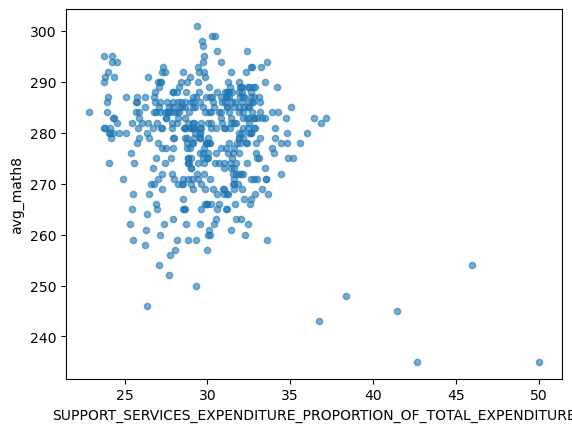

In [16]:
eduData.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PROPORTION_OF_TOTAL_EXPENDITURE', y='avg_math8', alpha=0.6)


Because I am analyzing grade 8 math scores, I compared them to the expenditure of support services. As we can see the support services doesn't have substantial effect on the scores.

**Visualization 2**

<Axes: xlabel='YEAR'>

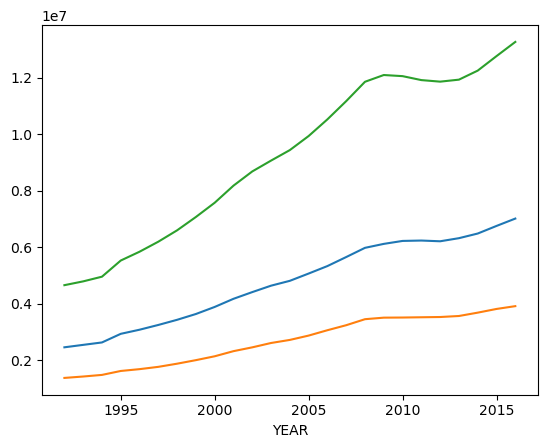

In [20]:
eduData.groupby('YEAR')["INSTRUCTION_EXPENDITURE"].mean().plot()
eduData.groupby('YEAR')["SUPPORT_SERVICES_EXPENDITURE"].mean().plot()
eduData.groupby('YEAR')["TOTAL_EXPENDITURE"].mean().plot()




I chose this visuaizaiton to analyze the expenditure of educaitonal budgets and find out whether it is cositently growing or not. I also wanted to see which budgets were utilized.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# X =
# y = 
X = eduData[['SUPPORT_SERVICES_EXPENDITURE_PROPORTION_OF_TOTAL_EXPENDITURE','AVG_MATH_4_SCORE']].dropna()
Y = eduData.loc[X.index]['avg_math8']

Y.fillna(Y.median(), inplace=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5, random_state=3)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [27]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [28]:
# create your model here
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [31]:
#The r^2 value is a common statistic used to calculate accuracy and i thoyght it would apply here.
output={model.score(X_test, y_test)}
print(f"R^2 value: {output}")

R^2 value: {0.8272280950117143}


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [36]:
col_name = 'AVG_MATH_8_SCORE'

f=plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Math Score of 8th Graders')
plt.title("Model Behavior On Training Set")

TypeError: 'module' object is not callable

<h2> Summary </h2>

In total, I analyzed the data set provided and identified some trends within that data. In relation to 8th graders' math scores, they are not related to suport services in any way and it can be reccomended to decrease support service spending and increase instruction spending. I also looked at trends in expenditure in the education sector and noticed that spending has increased substantially over the years, with instruction expenditure staying consitently above support services expen